# Loss Functions

In this exercise, you will compare the effects of Loss functions on a `LinearRegression` model.

👇 Let's download a CSV file to use for this challenge and parse it into a DataFrame

In [48]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/loss_functions_dataset.csv")
data.sample(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
530,0.98,514.5,294.0,110.25,7.0,0.40,32.66
640,0.79,637.0,343.0,147.00,7.0,0.40,43.85
262,0.76,661.5,416.5,122.50,7.0,0.10,33.05
539,0.86,588.0,294.0,147.00,7.0,0.40,34.01
385,0.98,514.5,294.0,110.25,7.0,0.25,29.17


🎯 Your task is to predict the average temperature inside a greenhouse based on its design. Your temperature predictions will help you select the appropriate greenhouse design for each plant, based on their climate needs. 

🌿 You know that plants can handle small temperature variations, but are exponentially more sensitive as the temperature variations increase. 

array([[<AxesSubplot:title={'center':'Relative Compactness'}>,
        <AxesSubplot:title={'center':'Surface Area'}>,
        <AxesSubplot:title={'center':'Wall Area'}>],
       [<AxesSubplot:title={'center':'Roof Area'}>,
        <AxesSubplot:title={'center':'Overall Height'}>,
        <AxesSubplot:title={'center':'Glazing Area'}>],
       [<AxesSubplot:title={'center':'Average Temperature'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

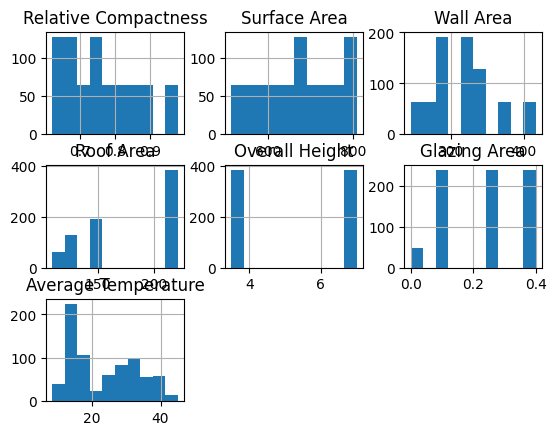

In [44]:
data.hist()

## 1. Theory 

❓ Theoretically, which Loss function would you train your model on to limit the risk of killing plants?

<details>
<summary> 🆘 Answer </summary>
    
By theory, you would use a Mean Square Error (MSE) Loss function. It would penalize outlier predictions and prevent your model from committing large errors. This would ensure smaller temperature variations and a lower risk for plants.

</details>

> YOUR ANSWER HERE

## 2. Application

### 2.1 Preprocessing

❓ Standardise the features

In [45]:

from sklearn.preprocessing import MinMaxScaler

r_scaler = MinMaxScaler() 

r_scaler.fit(data[['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Glazing Area']])  

X_scaled = r_scaler.transform(data[['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Glazing Area']])
data.head()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
0,0.98,514.5,294.0,110.25,7.0,0.0,18.44
1,0.98,514.5,294.0,110.25,7.0,0.0,18.44
2,0.98,514.5,294.0,110.25,7.0,0.0,18.44
3,0.98,514.5,294.0,110.25,7.0,0.0,18.44
4,0.90,563.5,318.5,122.50,7.0,0.0,24.56


### 2.2 Modeling

In this section, you are going to verify the theory by evaluating models optimized on different Loss functions.

### Least Squares (MSE) Loss

❓ **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **Least Squares Loss** (MSE)



In [54]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import cross_validate

y = data["Average Temperature"]
lin_reg_sgd = SGDRegressor(loss='squared_error')
cv_results = cross_validate(lin_reg_sgd, X,y, cv =10, scoring =["neg_mean_squared_error", "r2", "max_error","neg_mean_absolute_error"])
cv_results

{'fit_time': array([0.01536584, 0.01358271, 0.01409101, 0.01248002, 0.01567316,
        0.01526999, 0.01211476, 0.01476574, 0.0135088 , 0.01351619]),
 'score_time': array([0.00275302, 0.00273204, 0.00271416, 0.00331521, 0.00231791,
        0.00311327, 0.00273609, 0.00219798, 0.00219226, 0.00220013]),
 'test_neg_mean_squared_error': array([-18.66933976,  -6.92364648,  -9.90140524, -10.55348118,
         -6.43801242, -10.16504677,  -7.00092735,  -9.56645149,
         -9.99784445,  -6.34190767]),
 'test_r2': array([0.775864  , 0.89980931, 0.88698044, 0.87579034, 0.92593955,
        0.8921964 , 0.92389702, 0.9131729 , 0.89180898, 0.93479982]),
 'test_max_error': array([-9.345728  , -9.11795945, -9.30497813, -9.73523947, -9.35569951,
        -9.1450556 , -9.12362804, -9.34874328, -8.88351993, -8.19283101]),
 'test_neg_mean_absolute_error': array([-3.37629416, -2.02583711, -2.380343  , -2.53393098, -1.81719674,
        -2.26233341, -1.89200847, -2.23816621, -2.24620448, -1.8604301 ])}

❓ Compute 
- the mean cross-validated R2 score and save it in the variable `r2`
- the single biggest prediction error in °C of all your folds and save it in the variable `max_error`?

(Tips: `max_error` is an accepted scoring metric in sklearn)

In [72]:
r2 = cv_results['test_r2'].mean()
print(cv_results['test_neg_mean_squared_error'].mean())
max_error = cv_results['test_max_error'].mean()

-9.555806281777635


### Mean Absolute Error (MAE) Loss

What if we optimize our model on the MAE instead?

❓ **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **MAE** Loss

<details>
<summary>💡 Hints</summary>

- MAE loss cannot be directly specified in `SGDRegressor`. It must be engineered by adjusting the right parameters

</details>

In [73]:
mae_reg = SGDRegressor("epsilon_insensitive", epsilon = 0)
cv_result = cross_validate(mae_reg, X_scaled, y, cv=10, scoring = ["r2","max_error"])
cv_result


{'fit_time': array([0.02237105, 0.02297688, 0.02308989, 0.01647902, 0.01934099,
        0.01910496, 0.02034211, 0.02447104, 0.02146697, 0.02274513]),
 'score_time': array([0.00251269, 0.00302696, 0.00204492, 0.00189209, 0.00174999,
        0.00185394, 0.0015862 , 0.00193167, 0.00166202, 0.00162792]),
 'test_r2': array([-822.8365689 ,  -18.8150867 , -255.34618757, -358.59879751,
          -0.99945209, -557.86309361,   -4.47312041,   -3.10532966,
         -54.65907653, -394.71041828]),
 'test_max_error': array([-315.53626802,  -66.70904257, -180.76423931, -199.80719726,
         -22.01006   , -282.49866266,  -38.41999096,  -37.65889049,
         -90.47389032, -232.07196227])}

❓ Compute 
- the mean cross-validated R2 score, store it in `r2_mae`
- the single biggest prediction error of all your folds, store it in `max_error_mae`?

In [74]:
r2_mae = cv_result['test_r2'].mean()
max_error_mae = cv_result['test_max_error'].mean()

## 3. Conclusion

❓Which of the models you evaluated seems the most appropriate for your task?

<details>
<summary> 🆘Answer </summary>
    
Although mean cross-validated r2 scores are approximately similar between the two models, the one optimized on a MAE has more chance to make larger mistakes from time to time, increasing the risk of killing plants!

    
</details>

> YOUR ANSWER HERE

# 🏁 Check your code and push your notebook

In [75]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'loss_functions',
    r2 = r2,
    r2_mae = r2_mae,
    max_error = max_error,
    max_error_mae = max_error_mae
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Gauthier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Gauthier/code/gauthieret/data-loss-functions/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 3 items

test_loss_functions.py::TestLossFunctions::test_max_error_order PASSED   [ 33%]
test_loss_functions.py::TestLossFunctions::test_r2 PASSED                [ 66%]
test_loss_functions.py::TestLossFunctions::test_r2_mae FAILED            [100%]

=================================== FAILURES ===================================
________________________ TestLossFunctions.test_r2_mae _________________________

self = <tests.test_loss_functions.TestLossFunctions testMethod=test_r2_mae>

    def test_r2_mae(self):
>       self.assertGreater(self.result.r2_mae, 0.7)
E       AssertionError: -247.14071312529546 not greater tha